In [1]:
using DataFrames, RData
using StatsBase
using Plots

In [2]:
df = load("data/wage2015_subsample_inference.rdata", convert=true)["data"]

first(df, 5)

,wage,lwage,sex,shs,hsg,scl,clg,ad,mw
,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64
1,9.61538,2.26336,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2,48.0769,3.8728,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,11.0577,2.40313,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,13.9423,2.63493,1.0,0.0,0.0,0.0,0.0,1.0,0.0
5,28.8462,3.36198,1.0,0.0,0.0,0.0,1.0,0.0,0.0


In [59]:
#describe(df[:, [:wage, :lwage]])
describe(df) #, :mean, :median, :std)

,variable,mean,min,median,max,nmissing,eltype
,Symbol,Union…,Any,Union…,Any,Int64,DataType
1,wage,23.4104,3.02198,19.2308,528.846,0,Float64
2,lwage,2.97079,1.10591,2.95651,6.2707,0,Float64
3,sex,0.444466,0.0,0.0,1.0,0,Float64
4,shs,0.023301,0.0,0.0,1.0,0,Float64
5,hsg,0.243883,0.0,0.0,1.0,0,Float64
6,scl,0.278058,0.0,0.0,1.0,0,Float64
7,clg,0.31767,0.0,0.0,1.0,0,Float64
8,ad,0.137087,0.0,0.0,1.0,0,Float64
9,mw,0.259612,0.0,0.0,1.0,0,Float64


In [19]:
df[:, :wage]

5150-element Vector{Float64}:
  9.615384615384615
 48.07692307692308
 11.057692307692308
 13.942307692307692
 28.846153846153847
 11.73076923076923
 19.23076923076923
 19.23076923076923
 12.0
 19.23076923076923
 17.307692307692307
 12.01923076923077
 12.01923076923077
  ⋮
 19.71153846153846
 21.153846153846153
 45.54655870445344
 22.596153846153847
 16.826923076923077
 24.03846153846154
 13.846153846153847
 14.76923076923077
 23.076923076923077
 38.46153846153846
 32.967032967032964
 17.307692307692307

In [3]:
combine(groupby(df, :sex), :wage => mean)

,sex,wage_mean
,Float64,Float64
1,0.0,24.0193
2,1.0,22.6494


In [8]:
groupby(df, :sex) |> x -> combine(x, :wage => mean)  # Same as above but using pipe operator and anonymous functions

,sex,wage_mean
,Float64,Float64
1,0.0,24.0193
2,1.0,22.6494


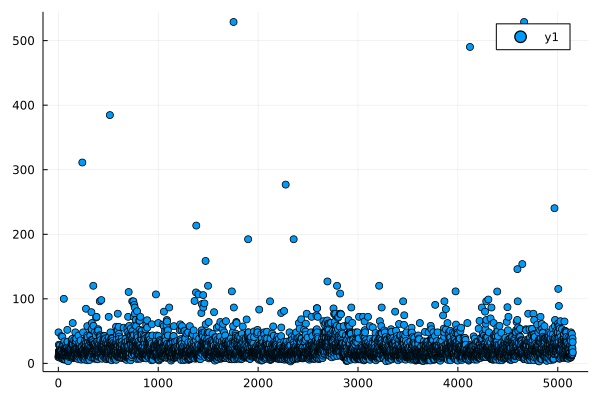

In [21]:
gr()

scatter(df.wage)

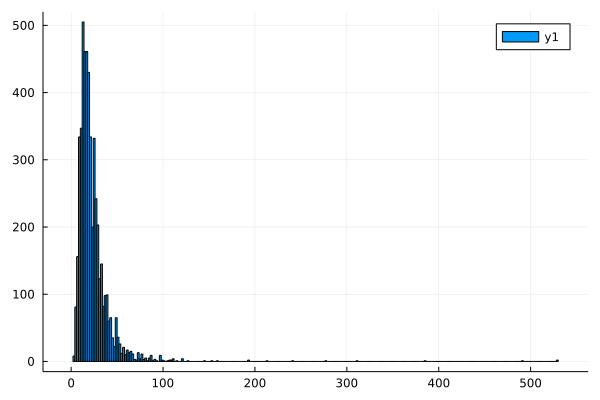

In [22]:
histogram(df.wage)

# Using RCalls

In [23]:
using RCall

In [24]:
R"x = rnorm(10)"

RObject{RealSxp}
 [1]  0.005858048 -1.363382783 -0.697370934 -1.215347523 -1.790722388
 [6] -0.481112540  0.054350297  1.121507273  0.041998762 -1.489792490


In [25]:
@rget x  # Extract x from R

10-element Vector{Float64}:
  0.005858047528467747
 -1.3633827832595076
 -0.6973709344112689
 -1.2153475229283004
 -1.7907223880341925
 -0.48111253952091765
  0.05435029734673868
  1.1215072728243496
  0.041998761501522125
 -1.4897924904308806

In [26]:
z = collect(1:10)
@rput z

10-element Vector{Int64}:
  1
  2
  3
  4
  5
  6
  7
  8
  9
 10

In [27]:
R"t.test(z)"

RObject{VecSxp}

	One Sample t-test

data:  z
t = 5.7446, df = 9, p-value = 0.0002782
alternative hypothesis: true mean is not equal to 0
95 percent confidence interval:
 3.334149 7.665851
sample estimates:
mean of x 
      5.5 



# Using GML for OLS

In [28]:
using GLM

In [30]:
names(df)

20-element Vector{String}:
 "wage"
 "lwage"
 "sex"
 "shs"
 "hsg"
 "scl"
 "clg"
 "ad"
 "mw"
 "so"
 "we"
 "ne"
 "exp1"
 "exp2"
 "exp3"
 "exp4"
 "occ"
 "occ2"
 "ind"
 "ind2"

In [32]:
ols = lm(@formula(wage ~ lwage+sex+lwage*sex), df)  # Fit the column lwage onto wage using the data in df

ols

StatsModels.TableRegressionModel{LinearModel{GLM.LmResp{Vector{Float64}}, GLM.DensePredChol{Float64, LinearAlgebra.CholeskyPivoted{Float64, Matrix{Float64}}}}, Matrix{Float64}}

wage ~ 1 + lwage + sex + lwage & sex

Coefficients:
──────────────────────────────────────────────────────────────────────────
                 Coef.  Std. Error       t  Pr(>|t|)  Lower 95%  Upper 95%
──────────────────────────────────────────────────────────────────────────
(Intercept)  -64.9733     1.29536   -50.16    <1e-99  -67.5128   -62.4339
lwage         29.785      0.425556   69.99    <1e-99   28.9508    30.6193
sex            8.45751    1.9791      4.27    <1e-04    4.57763   12.3374
lwage & sex   -2.94467    0.655479   -4.49    <1e-05   -4.22969   -1.65965
──────────────────────────────────────────────────────────────────────────

In [35]:
coef(ols)

4-element Vector{Float64}:
 -64.97332101271785
  29.785025426432558
   8.457505765671685
  -2.944668115227896

In [46]:
predict(ols, DataFrame(lwage=[1.,2.,3.], sex=[1,1,0]))

3-element Vector{Union{Missing, Float64}}:
 -29.675457935841504
  -2.835100624636838
  24.38175526657983

In [48]:
resid = df.wage - predict(ols)

5150-element Vector{Float64}:
  5.381691182051508
 -2.301270657312216
  4.453834710279525
 -0.2642843594952051
 -4.874685961511631
  2.1598476970760103
 -3.607242198046894
 -3.8556817565898562
  1.820032881747732
 -3.607242198046894
 -2.702405234374986
  2.931849829471499
  1.7962846869331486
  ⋮
 -3.7892315121503835
 -4.771420962382614
 -0.43383983109207236
 -5.293673017829427
 -2.2822919858876567
 -4.788802539319114
  0.5442048462433533
 -0.4549997237466279
 -4.654664081777884
 -5.270318923058646
 -6.173442499407386
 -2.640593041856377

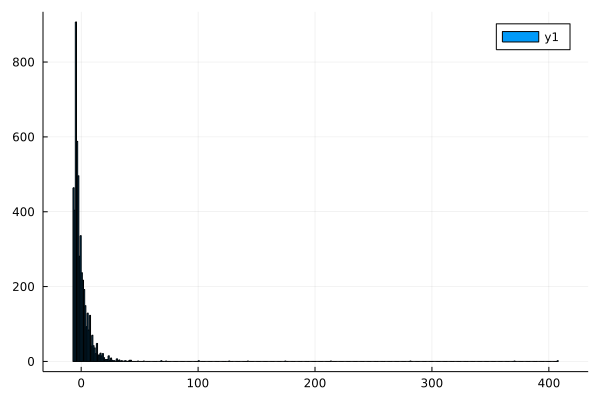

In [50]:
histogram(resid)

In [55]:
DataFrame(res=resid)

,res
,Float64
1,5.38169
2,-2.30127
3,4.45383
4,-0.264284
5,-4.87469
6,2.15985
7,-3.60724
8,-3.85568
9,1.82003


# Sampling

In [1]:
using Distributions, LinearAlgebra

function sampling(n, p)
    d = MvNormal(zeros(p), I)
    X = transpose(rand(d, n))
    return cor(X)
end

sampling (generic function with 1 method)

In [16]:
n = 500
p = n

corr_mat = sampling(n, p)

500×500 Matrix{Float64}:
  1.0         -0.0376812    0.0170524   …  -0.0219587   -0.0682335
 -0.0376812    1.0         -0.0137163      -0.014779    -0.0879473
  0.0170524   -0.0137163    1.0            -0.00547389   0.0496522
  0.0168933   -0.00220089   0.0515504       0.0559553    0.00414454
 -0.0109463    0.0151475    0.0424983       0.0642609    0.0271276
 -0.051505    -0.0369736    0.0095761   …   0.0218241   -0.00944419
 -0.00486085   0.0135318   -0.00211874     -0.0490573    0.0569035
 -0.0312103   -0.0510932    0.0406378       0.0467899   -0.0121527
  0.00204943  -0.0674686   -0.0142054      -0.0651794   -0.0250867
  0.0295508   -0.0166244   -0.0266973       0.00285407   0.0505118
  0.0945517   -0.0426855   -0.0325083   …   0.0191984   -0.01628
  0.109537    -0.0240446   -0.0849301       0.00202893  -0.0400489
  0.0107977   -0.00564218  -0.00311199     -0.0324183   -0.0466046
  ⋮                                     ⋱               
 -0.0228511    0.0193424   -0.0828501      -0.0

In [17]:
mean(corr_mat)

0.001952027642621748

In [19]:
rand(Normal(0, 1), 5)

5-element Vector{Float64}:
 -1.6507968091500627
 -1.2944192847674392
 -0.767663061289523
  1.3637540173637979
  0.6878210906028077